In [1]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from ast import literal_eval
from matplotlib.ticker import MaxNLocator

In [2]:
# Data for other analyses
def normalize_wordlist(wl):
    # convert string representation to real list, then normalize tokens
    if isinstance(wl, str):
        wl = literal_eval(wl)
    if wl is None:
        return []
    return [str(w).lower().strip().strip('\'') for w in wl if str(w).strip()]


# Helper functions
def count_keyword_in_speeches(df, keyword, exact_match=False):
    """Count speeches containing a keyword."""
    if exact_match:
        mask = df['wordlist'].apply(
            lambda lst: any(word.lower() == keyword.lower() for word in lst)
        )
    else:
        mask = df['wordlist'].apply(
            lambda lst: any(keyword.lower() in word.lower() for word in lst)
        )
    return df[mask].copy()

def plot_keyword_before_after(df, keyword, split_year, title_keyword=None):
    """Plot keyword mentions before and after a specific year."""
    if title_keyword is None:
        title_keyword = keyword
    
    df_keyword = count_keyword_in_speeches(df, keyword)
    
    before = (df_keyword['year'] < split_year).sum()
    after = (df_keyword['year'] >= split_year).sum()
    
    # Calculate proportions
    total_before = (df['year'] < split_year).sum()
    total_after = (df['year'] >= split_year).sum()
    prop_before = before / total_before if total_before > 0 else 0
    prop_after = after / total_after if total_after > 0 else 0
    
    # Print statistics
    print(f'Speeches mentioning "{keyword}" before {split_year}: {before}')
    print(f'Speeches mentioning "{keyword}" after {split_year}: {after}')
    print(f'Proportion before {split_year}: {prop_before:.4f}')
    print(f'Proportion after {split_year}: {prop_after:.4f}\n')
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Absolute counts
    labels = [f'Before {split_year}', f'After {split_year}']
    ax1.bar(labels, [before, after])
    ax1.set_title(f'Speeches Mentioning "{title_keyword}"\nBefore and After {split_year}', fontsize=16)
    ax1.set_ylabel('Number of Speeches', fontsize=13)
    ax1.tick_params(labelsize=13)
    
    # Proportions
    ax2.bar(labels, [prop_before, prop_after])
    ax2.set_title(f'Proportion of Speeches Mentioning "{title_keyword}"\nBefore and After {split_year}', fontsize=16)
    ax2.set_ylabel('Proportion of Speeches', fontsize=13)
    ax2.tick_params(labelsize=13)
    
    plt.tight_layout()
    plt.show()
    
    return df_keyword

def plot_keyword_by_year(df, keyword, title_keyword=None):
    """Plot keyword mentions over time."""
    if title_keyword is None:
        title_keyword = keyword
    
    df_keyword = count_keyword_in_speeches(df, keyword)
    keyword_by_year = df_keyword.groupby('year').size().sort_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(keyword_by_year.index, keyword_by_year.values, marker='o', linewidth=2, markersize=8)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Speeches Mentioning "{title_keyword}" Over Time', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Speeches', fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return keyword_by_year

In [3]:
# Data for NATO 2004 only
df_all = pd.read_json('data/putin_complete.json')
df_all = df_all[df_all['transcript_filtered'] != '']
df_all['year'] = pd.to_datetime(df_all['date']).dt.year

# Data for other analyses
df_talks_prepared = pd.read_csv(
    'data/putins_talks_prepared.csv',
    converters={'wordlist': literal_eval}  # try to convert list-like strings to lists
)
df_talks_prepared['wordlist'] = df_talks_prepared['wordlist'].apply(normalize_wordlist)
df_talks_prepared['year'] = pd.to_datetime(df_talks_prepared['date']).dt.year

display(df_all.head())
display(df_talks_prepared.head())

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,year
0,1999-12-31 00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Ev...",22280.0,"The Kremlin, Moscow",New Year Address by Acting President Vladimir ...,,[],"Dear friends, On New Year’s Eve, my family and...","[dear, friend, ,, on, New, Year, ’s, Eve, ,, m...",1999
1,1999-12-31 00:02:00,[],"Vladimir Putin: Good afternoon, distinguished ...",22326.0,"The Kremlin, Moscow",Address at an expanded meeting of the Russian ...,,[],"Good afternoon, distinguished colleagues. This...","[good, afternoon, ,, distinguished, colleague,...",1999
3,2000-01-04 00:00:00,[],"Question: Mr Putin, the sudden resignation of ...",24377.0,Moscow,Interview with the ORT TV Channel,,[],Let’s try. It was about ten days before the Ne...,"[let, ’s, try, ., , it, be, about, ten, day, ...",2000
4,2000-01-11 00:00:00,[],"Vladimir Putin: Dear friends, We are again gat...",24116.0,"State Kremlin Palace, Moscow",Speech at gala function marking the second mil...,,[],"Dear friends, We are again gathered here today...","[dear, friend, ,, we, be, again, gather, here,...",2000
5,2000-01-15 00:00:00,[],"Sergei Dorenko: Mr. Putin, how do you like you...",24123.0,,Interview with ORT Channel,,[],"No, they aren’t. The amount of work is about t...","[no, ,, they, be, n’t, ., , the, amount, of, ...",2000


,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages,year
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","[citizen, of, russia, ,, friend, ,, the, inaug...",[],2012
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","[mr, naryshkin, ,, deputy, of, the, russian, p...",['State_Governance_Public_Service'],2012
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"[citizen, of, russia, !, veteran, !, comrade, ...",['Security_Defense_Enforcement'],2012
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","[veteran, ,, colleague, ,, friend, !, we, all,...",[],2012
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","[good, afternoon, ,, i, want, to, thank, all, ...",['State_Governance_Public_Service'],2012


DEMOCRACY ANALYSIS
The word "democracy" appears in 120 speeches.



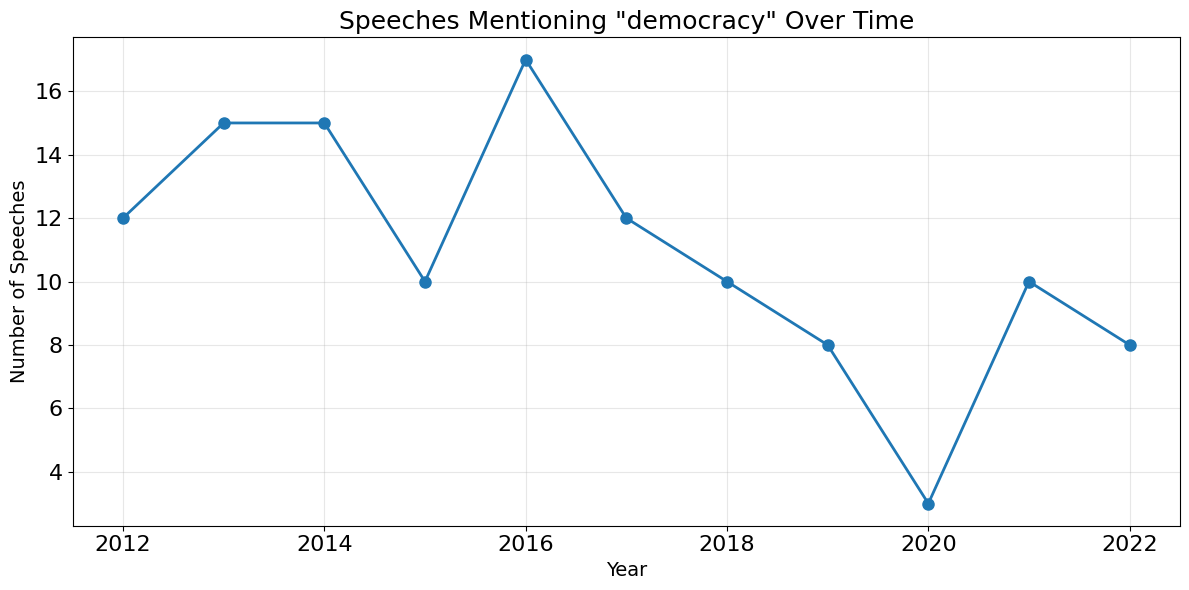


NATO ANALYSIS (2004 Split - NATO Expansion)
Speeches mentioning "nato" before 2004: 119
Speeches mentioning "nato" after 2004: 596
Proportion before 2004: 0.1376
Proportion after 2004: 0.0704



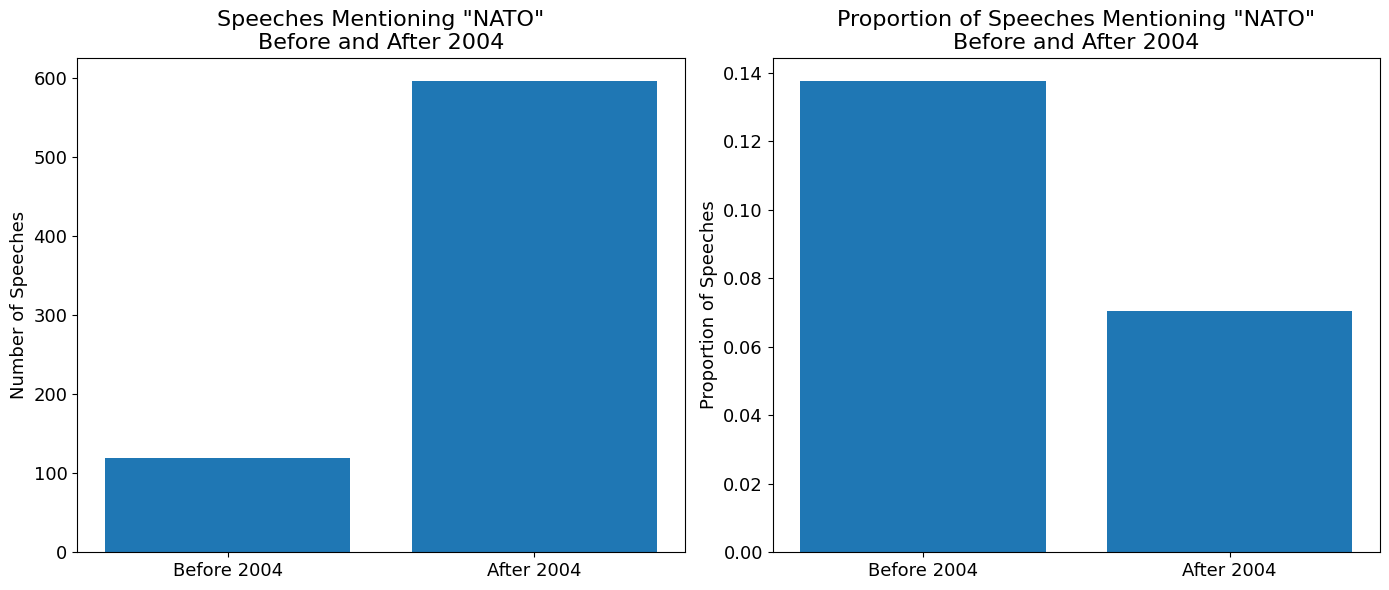


THREATS ANALYSIS (2014 Split - Crimea Annexation)
Speeches mentioning "threat" before 2014: 101
Speeches mentioning "threat" after 2014: 613
Proportion before 2014: 0.1191
Proportion after 2014: 0.1449



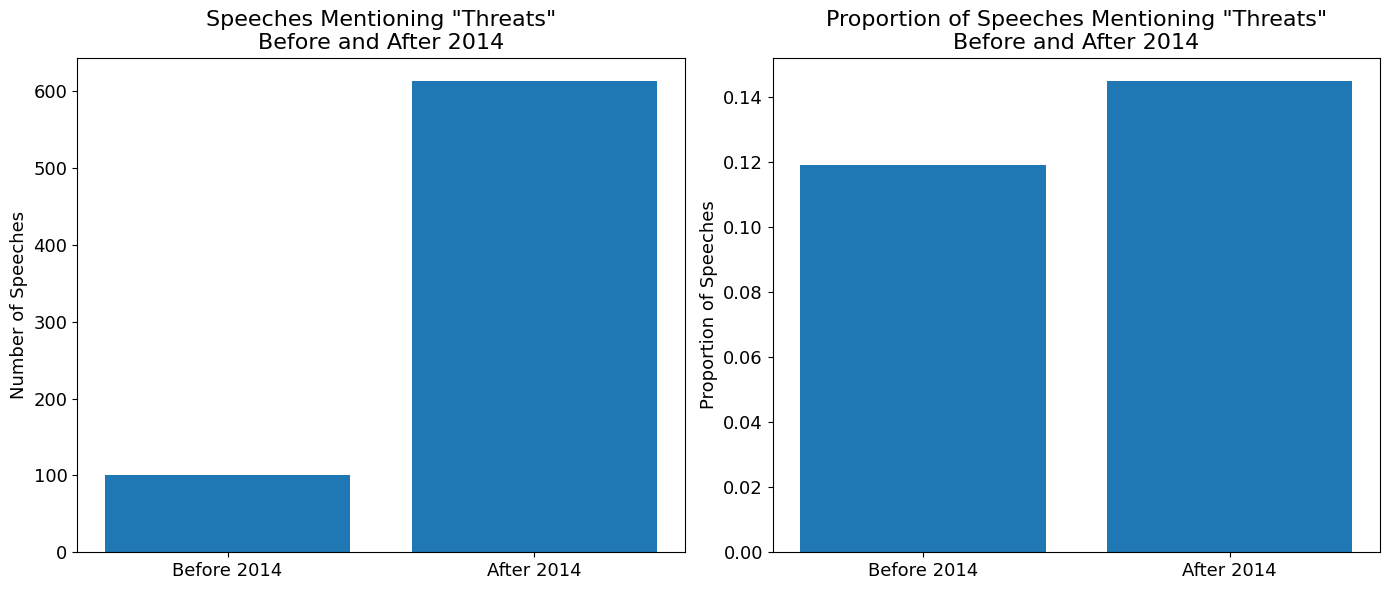


MULTIPOLAR WORLD ANALYSIS


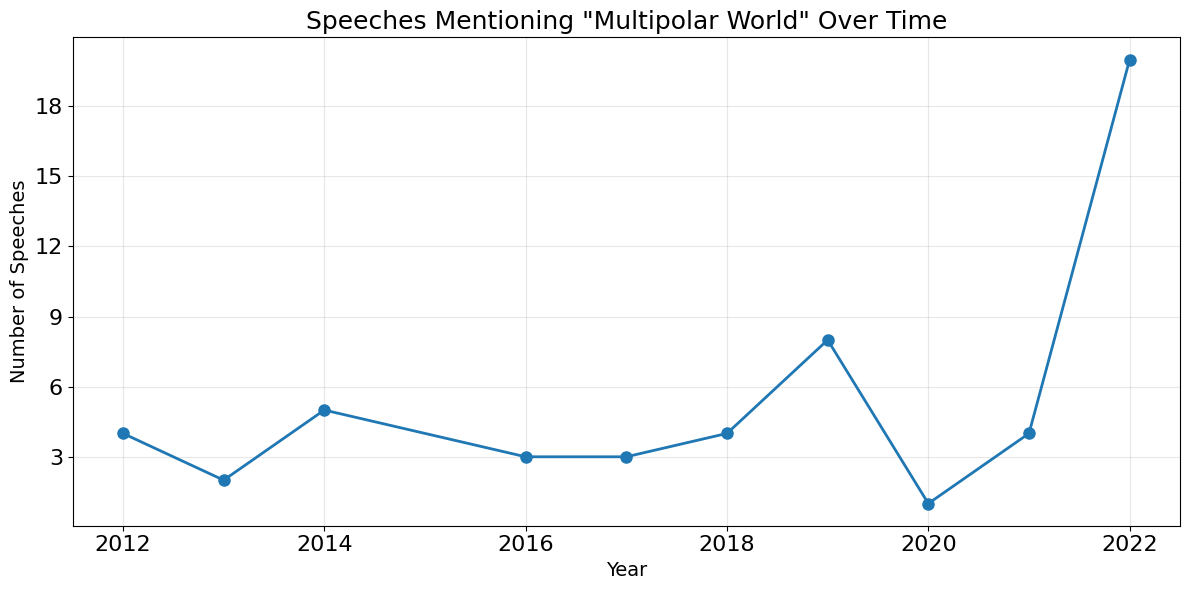

In [19]:
# Analysis 1: Democracy
print("=" * 60)
print("DEMOCRACY ANALYSIS")
print("=" * 60)
df_democracy = count_keyword_in_speeches(df_talks_prepared, 'democracy')
print(f'The word "democracy" appears in {len(df_democracy)} speeches.\n')
democracy_by_year = plot_keyword_by_year(df_talks_prepared, 'democracy')
# display(democracy_by_year)

# Analysis 2: NATO (before/after 2004 expansion)
print("\n" + "=" * 60)
print("NATO ANALYSIS (2004 Split - NATO Expansion)")
print("=" * 60)
df_nato = plot_keyword_before_after(df_all, 'nato', split_year=2004, title_keyword='NATO')

# Analysis 3: Threats (before/after 2014 Crimea annexation)
print("\n" + "=" * 60)
print("THREATS ANALYSIS (2014 Split - Crimea Annexation)")
print("=" * 60)
df_threats = plot_keyword_before_after(df_talks_prepared, 'threat', split_year=2014, title_keyword='Threats')

# Analysis 4: Multipolar world
print("\n" + "=" * 60)
print("MULTIPOLAR WORLD ANALYSIS")
print("=" * 60)
multipolar_by_year = plot_keyword_by_year(df_talks_prepared, 'multipolar', title_keyword='Multipolar World')
# display(multipolar_by_year)

# LLM

In [22]:
!pip install ollama

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 28.4 MB/s eta 0:00:00

  Attempting uninstall: typing-extensions

    Found existing installation: typing_extensions 4.13.2

    Uninstalling typing_extensions-4.13.2:

   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----------------------------------------  0/10 [typing-extensions]
   ----


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import ollama

def llm_mentions_nato_local(speech_text, model="gemma3"):
    prompt = f"""
You are given a political speech transcript with Vladimir Putin taking part in it.

Question:
Does this speech mention NATO or clearly discuss NATO-related topics? Can you give any context of it? Does Putin refer to NATO in any way?

Aswer ONLY with one word:
YES or NO.

Speech:
<<<
{speech_text}
>>>
"""
    response = ollama.chat(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        options={
            "temperature": 0
        }
    )

    return response["message"]["content"].strip().upper()

In [8]:
sample_speech = df_talks_prepared.iloc[0]['transcript_filtered']
print(llm_mentions_nato_local(sample_speech))

NO


In [ ]:
# Find sample NATO mention row in the dataframe
nato_mention = None
for idx, row in df_talks_prepared.iterrows():
    if 'nato' in row['wordlist']:
        print(f"Sample NATO mention found at index {idx}:")
        nato_mention = row['transcript_filtered']
        # find index of the string where it is mentioned
        nato_index = nato_mention.lower().find('nato')
        print(nato_mention[max(0, nato_index-50):nato_index+50])  # print 100 chars before and after
        break

Sample NATO mention found at index 35:
bia is obliged to observe military neutrality, so NATO will never be in Serbia. I openly said all th
NO


In [ ]:
print(llm_mentions_nato_local(sample_speech, model="llama3.1"))

NO, THIS SPEECH DOES NOT MENTION NATO OR CLEARLY DISCUSS NATO-RELATED TOPICS. THE SPEECH PRIMARILY FOCUSES ON DOMESTIC POLICY, ECONOMIC DEVELOPMENT, SOCIAL ISSUES, AND THE PRESIDENT'S PRIORITIES FOR RUSSIA'S FUTURE. IT ALSO TOUCHES ON INTERNATIONAL RELATIONS IN A VERY GENERAL SENSE, BUT THERE IS NO SPECIFIC REFERENCE TO NATO.


In [23]:
print(llm_mentions_nato_local(nato_mention, model="llama3.1"))

AFTER REVIEWING THE SPEECH TRANSCRIPT, I CAN CONCLUDE THAT:

* THE SPEECH DOES MENTION NATO, BUT ONLY IN A NEGATIVE CONTEXT: PRESIDENT TOMISLAV NIKOLIC EXPLICITLY STATES "NATO WILL NEVER BE IN SERBIA".
* THE SPEECH ALSO DISCUSSES TOPICS RELATED TO NATO'S PRESENCE IN THE REGION, SPECIFICALLY REGARDING KOSOVO AND METOHIJA (A DISPUTED TERRITORY CLAIMED BY SERBIA). HOWEVER, THESE DISCUSSIONS ARE MORE FOCUSED ON THE COUNTRY'S SOVEREIGNTY AND RELATIONS WITH RUSSIA RATHER THAN A CLEAR DISCUSSION ABOUT NATO ITSELF.

SO, WHILE THE SPEECH DOES NOT EXPLICITLY DISCUSS NATO-RELATED TOPICS AT LENGTH, IT DOES MENTION NATO AND TOUCHES UPON RELATED ISSUES.


In [26]:
print(llm_mentions_nato_local(nato_mention, model="llama3.1"))

ODPOWIEDŹ JEST NEGATYWNA.


In [19]:
print(llm_mentions_nato_local(sample_speech, model="gemma3"))

NO, THIS SPEECH DOES NOT MENTION NATO OR CLEARLY DISCUSS NATO-RELATED TOPICS. 

WHILE THE SPEECH REFERENCES “SERIOUS TESTS” FACED BY RUSSIA AND “AGGRESSION,” IT DOES SO IN A GENERAL SENSE REFERRING TO EXTERNAL THREATS WITHOUT SPECIFICALLY NAMING NATO. THE FOCUS IS ON RUSSIA’S SECURITY, ITS RESISTANCE TO PERCEIVED AGGRESSION, AND ITS INTERNAL DEVELOPMENT. THERE IS NO DISCUSSION OF ALLIANCES, DEFENSE AGREEMENTS, OR ANY NATO-RELATED ISSUES.


In [22]:
print(llm_mentions_nato_local(nato_mention, model="gemma3"))

YES, THIS SPEECH EXPLICITLY MENTIONS NATO AND DISCUSSES NATO-RELATED TOPICS. HERE’S A BREAKDOWN OF WHERE IT APPEARS:

*   **“NATO WILL NEVER BE IN SERBIA.”** – THIS IS A DIRECT AND CLEAR STATEMENT ABOUT SERBIA’S RELATIONSHIP WITH NATO.
*   **“IN LINE WITH THE NATIONAL ASSEMBLY RESOLUTION, SERBIA IS OBLIGED TO OBSERVE MILITARY NEUTRALITY, SO NATO WILL NEVER BE IN SERBIA.”** – THIS REINFORCES THE PREVIOUS STATEMENT AND EXPLAINS THE BASIS FOR THE POLICY.

THE SPEECH REPEATEDLY EMPHASIZES SERBIA’S COMMITMENT TO MILITARY NEUTRALITY AS A KEY FACTOR PREVENTING NATO INVOLVEMENT.


In [32]:
print(llm_mentions_nato_local(nato_mention, model="gemma3"))

HERE’S AN ANALYSIS OF THE SPEECH TRANSCRIPT REGARDING NATO:

**DOES THIS SPEECH MENTION NATO OR CLEARLY DISCUSS NATO-RELATED TOPICS?**

YES, THE SPEECH *DOES* MENTION NATO, THOUGH IT’S DONE SO INDIRECTLY AND WITH A VERY SPECIFIC ASSERTION.

**CAN YOU GIVE ANY CONTEXT OF IT?**

THE CONTEXT IS CRUCIAL. TOMISLAV NIKOLIC, THE NEWLY ELECTED SERBIAN PRESIDENT, IS EXPLICITLY STATING A KEY ELEMENT OF SERBIAN FOREIGN POLICY. HE’S RESPONDING TO A QUESTION ABOUT SERBIA’S RELATIONSHIP WITH THE EU AND ITS FUTURE. THE CORE OF THE DISCUSSION REVOLVES AROUND SERBIA’S DESIRE TO MAINTAIN ITS INDEPENDENCE AND SOVEREIGNTY, PARTICULARLY IN RELATION TO KOSOVO AND METOHIJA.

**DOES PUTIN REFER TO NATO IN ANY WAY?**

YES, PUTIN DOES REFER TO NATO, BUT IT’S FRAMED AS A GUARANTEE. NIKOLIC STATES: “I OPENLY SAID ALL THAT TO THE SERBIAN PEOPLE DURING THE CAMPAIGN AND THEY VOTED FOR ME. I AM AWARE OF RUSSIA’S LOAN TO SERBIA: WE RECEIVED $200 MILLION IN SUPPORT. IT WAS A VERY SIMPLE PROJECT. I ASSURE YOU THAT WE WI

In [24]:
nato_mention

'Mr President, It gives me great pleasure to welcome you to Moscow, and to congratulate you in person on being elected President of Serbia. I wish you to implement everything that was stated in your election programme and to fulfil the Serbian people’s expectations. There are many challenges and they are tough. I hope that the cooperation between Serbia and Russia will help us reach the goals our country has set and tackle the problems facing the Serbian leadership. You are well aware of our position on complex, sensitive international issues. We firmly believe that UN resolutions must be implemented, particularly Resolution 1244. In terms of economic cooperation, I can state with satisfaction that trade between our countries increased by almost 50% in the past year. Russian investments in the Serbian economy amount to $1.4 billion. Overall, that is a good indicator. In 2010 Russia issued a $200 million-loan to Serbia and now we are ready to release the second tranche of $800 million. 

In [37]:
import time
from tqdm.auto import tqdm
tqdm.pandas()

df_llm = df_talks_prepared.head(50).copy()

start_time = time.time()

df_llm["llm_nato"] = df_llm["transcript_filtered"].progress_apply(
    lambda x: llm_mentions_nato_local(x)
)

end_time = time.time()

print(df_llm["llm_nato"].value_counts())
print(f"Total runtime: {end_time - start_time:.2f} seconds")
print(f"Avg per speech: {(end_time - start_time)/len(df_llm):.2f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

llm_nato
NO     40
YES    10
Name: count, dtype: int64
Total runtime: 19.56 seconds
Avg per speech: 0.39 seconds


In [ ]:
nato_llm_count = (df_llm["llm_nato"] == "YES").sum()
print(f"NATO-related speeches (LLM): {nato_llm_count} / {len(df_llm)}")